In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Get the latest version number
model_versions = [5]
latest_version = max(model_versions) if model_versions else 0

# Load the latest model
model_path = f"./models/{latest_version}"
model = tf.keras.models.load_model(model_path)


In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Testing",
    shuffle=True,
    image_size=(256,256),
    batch_size=32
)

Found 1311 files belonging to 4 classes.


In [3]:
class_names=dataset.class_names
print(class_names)
print(len(class_names))
print(len(dataset))

['glioma', 'meningioma', 'notumor', 'pituitary']
4
41


In [4]:
Test_dataset=dataset.take(82)
scores=model.evaluate(Test_dataset)
scores

41/41 [==============================] - 22s 71ms/step - loss: 0.1436 - accuracy: 0.9641


[0.1435515284538269, 0.9641494750976562]

In [6]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidance=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidance

1/1 [==============================] - 0s 40ms/step


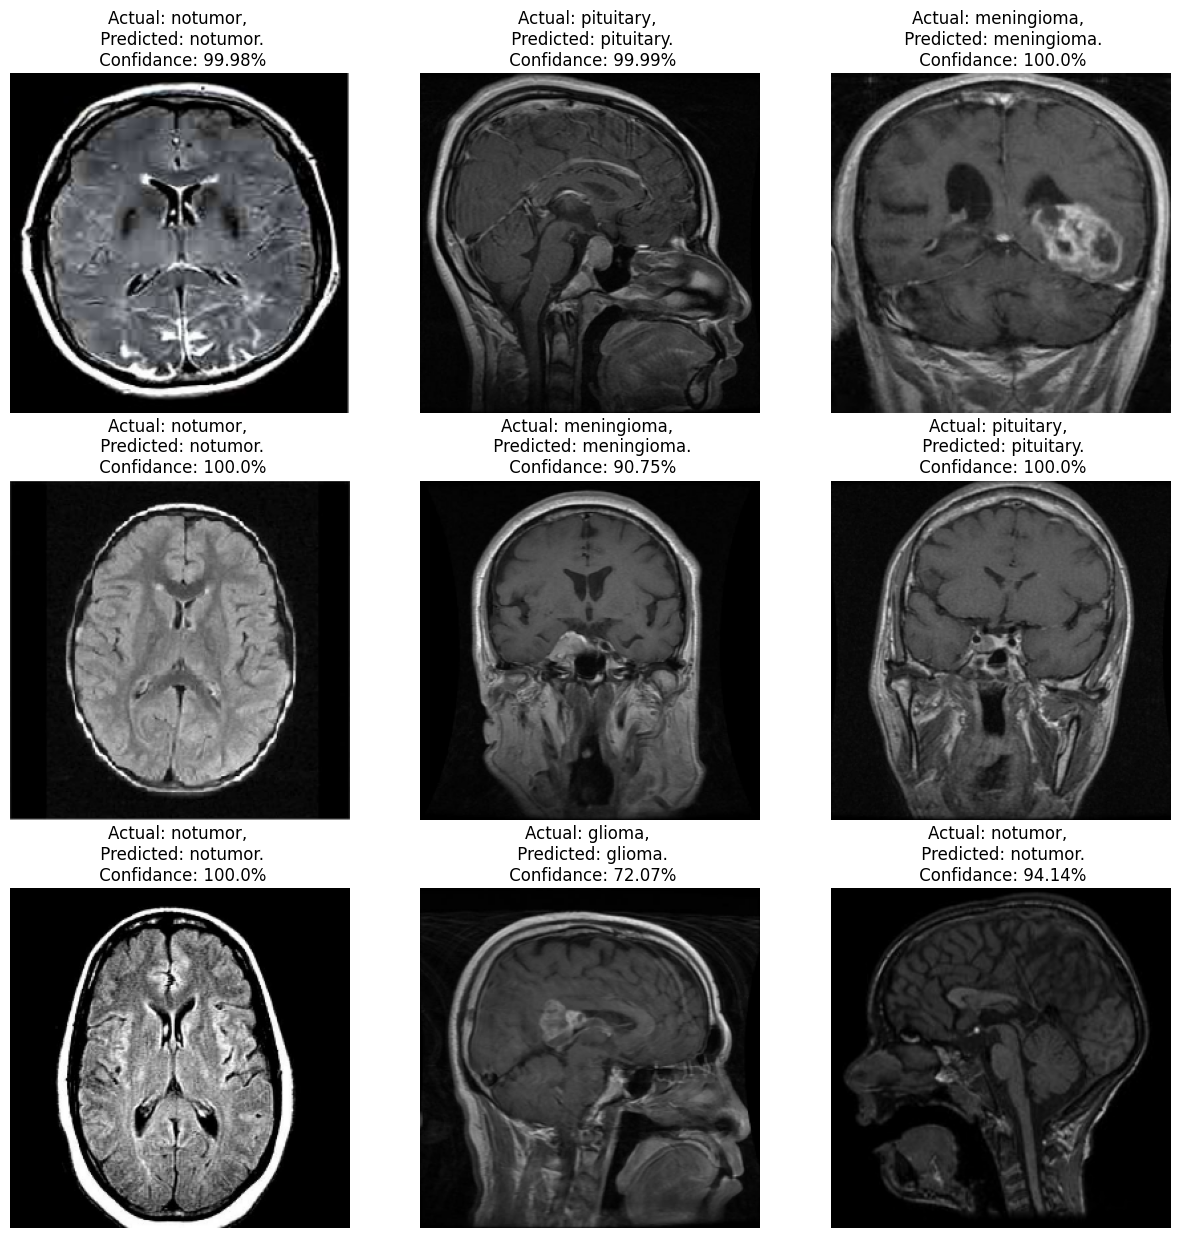

In [7]:
plt.figure(figsize=(15,15))
for images, labels in Test_dataset.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidance=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidance: {confidance}%")
        plt.axis("off")